Data type of spacing column: <class 'str'>


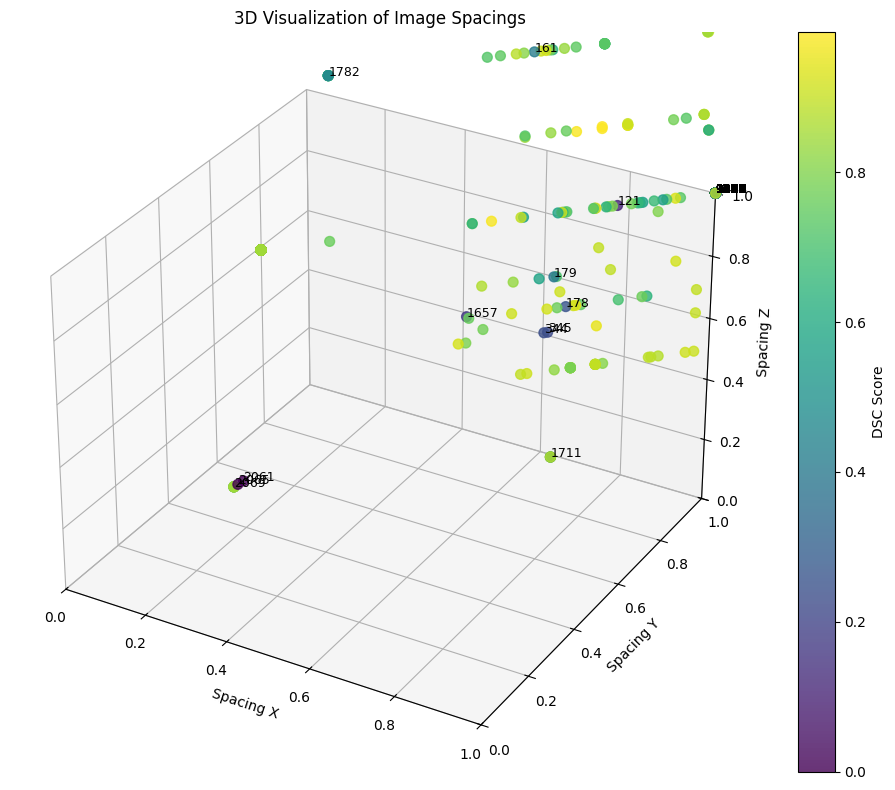

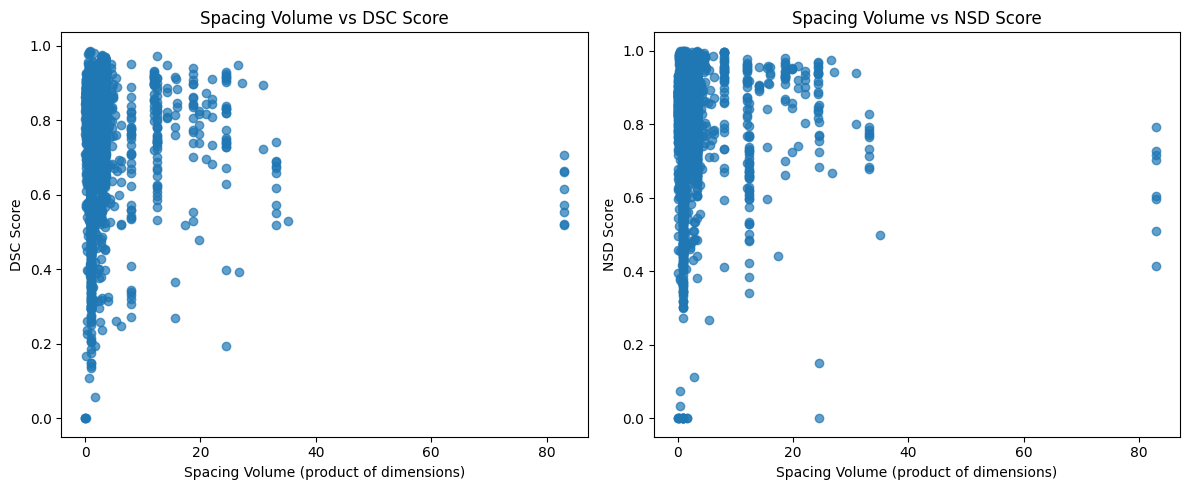

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import re

def parse_spacing_string(spacing_str):
    # Extract numbers using regex
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", spacing_str)
    # Convert to float and create numpy array
    return np.array([float(num) for num in numbers])

# Load the data from CSV
df = pd.read_csv('segmentation_metrics_results.csv')

# The spacing column likely contains string representations of arrays like "[0.5, 0.5, 1.0]"
# We need to convert these strings to actual arrays
# First, check the type of the spacing column
print("Data type of spacing column:", type(df['spacing'].iloc[0]))

# If spacing is stored as string, convert it to numpy arrays
if isinstance(df['spacing'].iloc[0], str):
    df['spacing'] = df['spacing'].apply(lambda x: parse_spacing_string(x))

# Extract x, y, z components of spacing
x = np.array([s[0] for s in df['spacing']])
y = np.array([s[1] for s in df['spacing']])
z = np.array([s[2] for s in df['spacing']])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Add color based on DSC score for additional insight
scatter = ax.scatter(x, y, z, c=df['dsc'], cmap='viridis', s=50, alpha=0.8)

# Add labels and title
ax.set_xlabel('Spacing X')
ax.set_ylabel('Spacing Y')
ax.set_zlabel('Spacing Z')
ax.set_title('3D Visualization of Image Spacings')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# Add a color bar to show DSC values
cbar = plt.colorbar(scatter)
cbar.set_label('DSC Score')

# Add annotations for points with extreme values
threshold = np.percentile(df['dsc'], 10)  # Bottom 10% of DSC scores
for i, (xi, yi, zi, dsci) in enumerate(zip(x, y, z, df['dsc'])):
    if dsci < threshold:
        ax.text(xi, yi, zi, f"{i}", fontsize=9)

plt.tight_layout()
plt.show()

# Let's also create a plot to see if there's a relationship between spacing and DSC/NSD
plt.figure(figsize=(12, 5))

# Calculate spacing volume (product of dimensions)
df['spacing_volume'] = np.array([np.prod(s) for s in df['spacing']])

# Plot 1: Spacing volume vs DSC
plt.subplot(1, 2, 1)
plt.scatter(df['spacing_volume'], df['dsc'], alpha=0.7)
plt.xlabel('Spacing Volume (product of dimensions)')
plt.ylabel('DSC Score')
plt.title('Spacing Volume vs DSC Score')

# Plot 2: Spacing volume vs NSD
plt.subplot(1, 2, 2)
plt.scatter(df['spacing_volume'], df['nsd'], alpha=0.7)
plt.xlabel('Spacing Volume (product of dimensions)')
plt.ylabel('NSD Score')
plt.title('Spacing Volume vs NSD Score')

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval
import plotly.express as px
import plotly.graph_objects as go



# If spacing is stored as string, convert it to numpy arrays
if isinstance(df['spacing'].iloc[0], str):
    df['spacing'] = df['spacing'].apply(lambda x: parse_spacing_string(x))

# Extract x, y, z components of spacing
x = np.array([s[0] for s in df['spacing']])
y = np.array([s[1] for s in df['spacing']])
z = np.array([s[2] for s in df['spacing']])

# Calculate spacing volume (product of dimensions)
df['spacing_volume'] = np.array([np.prod(s) for s in df['spacing']])

# Create interactive 3D scatter plot with Plotly
fig = px.scatter_3d(
    x=x, y=y, z=z, 
    color=df['dsc'], 
    opacity=0.8,
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'color': 'DSC Score'},
    title='Interactive 3D Visualization of Image Spacings',
    size_max=10
)

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Spacing X',
        yaxis_title='Spacing Y',
        zaxis_title='Spacing Z',
        # Set axis limits if needed
        xaxis=dict(range=[0, 2]),
        yaxis=dict(range=[0, 2]),
        zaxis=dict(range=[0, 2]),
    ),
    width=900,
    height=700,
    margin=dict(r=20, l=10, b=10, t=30)
)


In [6]:


# Example
spacing_str = '[0.84600002 0.84600002 5. ]'
spacing_array = parse_spacing_string(spacing_str)
print(spacing_array)

[0.84600002 0.84600002 5.        ]
